In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
os.chdir('..')

In [3]:
from tools import read_robustness_packets

# checks

In [4]:
def ensure_models_vanillas_unchanged(data, model_field, silent=False):
    data = data.copy(deep=True)
    if 'random_gaze' in data.columns:
        data = data[data['random_gaze'] == False]    
    
    for m in np.unique(data[model_field]):
        if not silent:
            print('checking vanilla metrics sanity for model {} ...'.format(m))
        model_stats = data[data[model_field] == m]
        
        #allow some numerical noise (up to 2 unique values that are within default np tolerance)
        if len(np.unique(model_stats['vanilla_accuracy'])) != 1:
            if len(np.unique(model_stats['vanilla_accuracy'])) != 2:
                raise ValueError
            else:
                print('found some noise, validating with np.allclose')
                if not np.allclose(np.unique(model_stats['vanilla_accuracy'])[0], np.unique(model_stats['vanilla_accuracy'])[1]):
                    raise ValueError
                    
        if len(np.unique(model_stats['vanilla_loss'])) != 1:
            if len(np.unique(model_stats['vanilla_loss'])) != 2:
                raise ValueError
            else:
                print('found some noise, validating with np.allclose')
                if not np.allclose(np.unique(model_stats['vanilla_loss'])[0], np.unique(model_stats['vanilla_loss'])[1]):
                    raise ValueError

# build dataframe

In [5]:
#build cifar10 data
CIFAR10_vanilla = pickle.load(open('cluster_runs/adversary/final_store/CIFAR10/standard_performance.packet', 'rb'))
CIFAR10_misclassify1 = pickle.load(open('cluster_runs/adversary/final_store/CIFAR10/misclassify_performance.packet', 'rb'))
CIFAR10_misclassify3 = pickle.load(open('cluster_runs/adversary/final_store/CIFAR10/misclassify3_performance.packet', 'rb'))

CIFAR10_misclassify1['criterion_tag'] = ['misclassify_1']*len(CIFAR10_misclassify1['models'])
CIFAR10_misclassify1['vanilla_accuracy'] = [CIFAR10_vanilla['accuracy'][CIFAR10_vanilla['models'].index(i)] for i in CIFAR10_misclassify1['models']]
CIFAR10_misclassify1['vanilla_loss'] = [CIFAR10_vanilla['loss'][CIFAR10_vanilla['models'].index(i)] for i in CIFAR10_misclassify1['models']]

CIFAR10_misclassify3['criterion_tag'] = ['misclassify_3']*len(CIFAR10_misclassify3['models'])
CIFAR10_misclassify3['vanilla_accuracy'] = [CIFAR10_vanilla['accuracy'][CIFAR10_vanilla['models'].index(i)] for i in CIFAR10_misclassify3['models']]
CIFAR10_misclassify3['vanilla_loss'] = [CIFAR10_vanilla['loss'][CIFAR10_vanilla['models'].index(i)] for i in CIFAR10_misclassify3['models']]

CIFAR10_data = pd.concat([pd.DataFrame.from_records(CIFAR10_misclassify1), pd.DataFrame.from_records(CIFAR10_misclassify3)])

assert(len(CIFAR10_data) == len(CIFAR10_misclassify3['models']) + len(CIFAR10_misclassify1['models'])), '{} == {} + {}'.format(len(CIFAR10_data), len(CIFAR10_misclassify3['models']), len(CIFAR10_misclassify1['models']))
ensure_models_vanillas_unchanged(CIFAR10_data, 'models', silent=False)

checking vanilla metrics sanity for model baseline ...
checking vanilla metrics sanity for model coarse fixations ...
checking vanilla metrics sanity for model cortical sampling ...
checking vanilla metrics sanity for model madry adv trained ...
checking vanilla metrics sanity for model madry baseline ...
checking vanilla metrics sanity for model retinal sampling ...


In [6]:
#build imagenet10 data
imagenet10_targeted = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET10/targeted')
imagenet10_misclassify = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET10/misclassify')
imagenet10_targeted80_misclassify3 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET10/targeted_and_misclassify_strong')

imagenet10_targeted['criterion_tag'] = 'targeted_50'
imagenet10_misclassify['criterion_tag'] = 'misclassify_1'
imagenet10_targeted80_misclassify3.loc[imagenet10_targeted80_misclassify3['attack_criteria_targeted'] == True, 'criterion_tag'] = 'targeted_80'
imagenet10_targeted80_misclassify3.loc[imagenet10_targeted80_misclassify3['attack_criteria_targeted'] == False, 'criterion_tag'] = 'misclassify_3'

imagenet10_data = pd.concat([imagenet10_targeted, imagenet10_misclassify, imagenet10_targeted80_misclassify3])

assert(len(imagenet10_data) == len(imagenet10_targeted) + len(imagenet10_misclassify) + len(imagenet10_targeted80_misclassify3))
ensure_models_vanillas_unchanged(imagenet10_data, 'model_tag', silent=False)

checking vanilla metrics sanity for model CNNwBRANCHED ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model CNNwSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONSwBLUR ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONSwUPSAMPLE ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model CNNwoSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model ECNNwSAMPLINGwAUXILIARY ...
checking vanilla metrics sanity for model ECNNwSAMPLINGwoAUXILIARY ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwAUXILIARY ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model ECNNwoSAMPLINGwSINGLESCALE ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model ECNNwoSAMPLINGwoAUXILIARY ...
found some noise, validating with n

In [7]:
# #build imagenet100 subsampled data
# imagenet100_subsample_misclassify1 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100_subsampled/untargeted_1')
# imagenet100_subsample_misclassify3 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100_subsampled/untargeted_3')
# imagenet100_subsample_misclassify10 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100_subsampled/untargeted_10')

# imagenet100_subsample_misclassify1['criterion_tag'] = 'misclassify_1'
# imagenet100_subsample_misclassify3['criterion_tag'] = 'misclassify_3'
# imagenet100_subsample_misclassify10['criterion_tag'] = 'misclassify_10'

# imagenet100_subsample_data = pd.concat([imagenet100_subsample_misclassify1, imagenet100_subsample_misclassify3, imagenet100_subsample_misclassify10])

# assert(len(imagenet100_subsample_data) == len(imagenet100_subsample_misclassify10) + len(imagenet100_subsample_misclassify3) + len(imagenet100_subsample_misclassify1))
# ensure_models_vanillas_unchanged(imagenet100_subsample_data, 'model_tag', silent=False)

In [8]:
#build imagenet100 data
imagenet100_misclassify1 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100/misclassify_1')
imagenet100_misclassify3 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100/misclassify_3')
imagenet100_misclassify10 = read_robustness_packets('cluster_runs/adversary/final_store/IMAGENET100/misclassify_10')

imagenet100_misclassify1['criterion_tag'] = 'misclassify_1'
imagenet100_misclassify3['criterion_tag'] = 'misclassify_3'
imagenet100_misclassify10['criterion_tag'] = 'misclassify_10'

imagenet100_data = pd.concat([imagenet100_misclassify1, imagenet100_misclassify3, imagenet100_misclassify10])
assert(len(imagenet100_data) == len(imagenet100_misclassify1) + len(imagenet100_misclassify3) + len(imagenet100_misclassify10))
ensure_models_vanillas_unchanged(imagenet100_data, 'model_tag', silent=False)

checking vanilla metrics sanity for model CNNwSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwAUXILIARY ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwoAUXILIARY ...


# determinism sanity check

In [17]:
imagenet10_data[(imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONS') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['epsilon'] == 0.01)][['adversarial_accuracy', 'vanilla_loss', 'vanilla_accuracy']]

,adversarial_accuracy,vanilla_loss,vanilla_accuracy
4,0.118,0.438888,0.912


In [ ]:
#CNNwoSAMPLINGwFIXATIONS (w. determinism patch)
loss: 0.4388880431652069
accuracy: 0.912
(epsilon=0.01) accuracy: 0.118

In [ ]:
#CNNwoSAMPLINGwFIXATIONS (wo. determinism patch)
loss: 0.4388880133628845
accuracy: 0.912
(epsilon=0.01) accuracy: 0.118

In [18]:
imagenet10_data[(imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['model_tag'] == 'ECNNwoSAMPLINGwAUXILIARY') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['epsilon'] == 0.01)][['adversarial_accuracy', 'vanilla_loss', 'vanilla_accuracy']]

,adversarial_accuracy,vanilla_loss,vanilla_accuracy
4,0.396,0.798336,0.886


In [ ]:
#cortical sampling (wo. determinism patch)
loss: 0.7983362078666687
accuracy: 0.886
(epsilon=0.01) accuracy: 0.396

In [19]:
imagenet10_data[(imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['model_tag'] == 'CNNwSAMPLINGwoFIXATIONS') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['epsilon'] == 0.01)][['adversarial_accuracy', 'vanilla_loss', 'vanilla_accuracy']]

,adversarial_accuracy,vanilla_loss,vanilla_accuracy
4,0.342,0.52703,0.902


In [ ]:
#retinal sampling (wo. determinism patch)
loss: 0.5270304083824158
accuracy: 0.902
(epsilon=0.01) accuracy: 0.34199999999999997

# hyperparams

In [39]:
CIFAR10_data[['criterion_tag']].drop_duplicates().reset_index(drop=True)

,criterion_tag
0,misclassify_1
1,misclassify_3


In [42]:
imagenet10_data[['attack_algo', 'attack_distance_metric', 'attack_iterations', 'attack_step_size', 'criterion_tag']].drop_duplicates().reset_index(drop=True)

,attack_algo,attack_distance_metric,attack_iterations,attack_step_size,criterion_tag
0,PGD,L2,5,0.100,targeted_50
1,PGD,LINF,20,0.025,targeted_50
2,PGD,LINF,20,0.100,targeted_50
3,PGD,LINF,5,0.100,targeted_50
4,PGD,L2,5,0.100,misclassify_1
5,PGD,LINF,20,0.025,misclassify_1
6,PGD,LINF,20,0.100,misclassify_1
7,PGD,LINF,5,0.100,misclassify_1
8,FGSM,LINF,1,-1.000,misclassify_3
9,PGD,L1,5,0.100,misclassify_3


In [43]:
imagenet10_data[['attack_algo', 'attack_distance_metric', 'attack_iterations', 'attack_step_size', 'criterion_tag', 'attack_random_init', 'random_gaze']].drop_duplicates().reset_index(drop=True)

,attack_algo,attack_distance_metric,attack_iterations,attack_step_size,criterion_tag,attack_random_init,random_gaze
0,PGD,L2,5,0.100,targeted_50,False,False
1,PGD,LINF,20,0.025,targeted_50,False,False
2,PGD,LINF,20,0.100,targeted_50,False,False
3,PGD,LINF,5,0.100,targeted_50,False,False
4,PGD,L2,5,0.100,misclassify_1,False,False
5,PGD,LINF,20,0.025,misclassify_1,False,False
6,PGD,LINF,20,0.100,misclassify_1,False,False
7,PGD,LINF,5,0.100,misclassify_1,False,False
8,FGSM,LINF,1,-1.000,misclassify_3,False,False
9,PGD,L1,5,0.100,misclassify_3,False,False


In [38]:
imagenet100_data[['attack_algo', 'attack_criteria_targeted', 'attack_distance_metric', 'attack_iterations', 'attack_step_size', 'criterion_tag']].drop_duplicates().reset_index(drop=True)

,attack_algo,attack_criteria_targeted,attack_distance_metric,attack_iterations,attack_step_size,criterion_tag
0,PGD,False,L2,5,0.1,misclassify_1
1,PGD,False,LINF,5,0.1,misclassify_1
2,PGD,False,L2,5,0.1,misclassify_3
3,PGD,False,LINF,5,0.1,misclassify_3
4,PGD,False,L2,5,0.1,misclassify_10
5,PGD,False,LINF,5,0.1,misclassify_10


# standard performance

In [9]:
def standard_performance(dataset_data, model_tag):
    dataset_model = []
    dataset_accuracy = []
    dataset_loss = []

    if 'random_gaze' in dataset_data.columns:
        dataset_data = dataset_data[dataset_data['random_gaze'] == False]
    for m in np.unique(dataset_data[model_tag]):
        dataset_model.append(m)
        accuracy = np.unique(dataset_data[dataset_data[model_tag] == m]['vanilla_accuracy'].values)
        loss = np.unique(dataset_data[dataset_data[model_tag] == m]['vanilla_loss'].values)
        assert(len(accuracy) == 1 or len(accuracy) == 2), accuracy
        assert(len(loss) == 1 or len(loss) == 2), loss
        dataset_accuracy.append(accuracy[0])
        dataset_loss.append(loss[0])
        
    return dataset_model, dataset_accuracy, dataset_loss

In [10]:
ensure_models_vanillas_unchanged(CIFAR10_data, 'models', silent=False)
model, acc, loss = standard_performance(CIFAR10_data, 'models')
print(pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']].to_latex(index=False))
pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']]

checking vanilla metrics sanity for model baseline ...
checking vanilla metrics sanity for model coarse fixations ...
checking vanilla metrics sanity for model cortical sampling ...
checking vanilla metrics sanity for model madry adv trained ...
checking vanilla metrics sanity for model madry baseline ...
checking vanilla metrics sanity for model retinal sampling ...
\begin{tabular}{lrr}
\toprule
             model &  accuracy &      loss \\
\midrule
          baseline &    0.8813 &  0.560075 \\
  coarse fixations &    0.8770 &  0.384103 \\
 cortical sampling &    0.8516 &  0.651266 \\
 madry adv trained &    0.8714 &  0.459215 \\
    madry baseline &    0.9501 &  0.208421 \\
  retinal sampling &    0.8888 &  0.339913 \\
\bottomrule
\end{tabular}



,model,accuracy,loss
0,baseline,0.8813,0.560075
1,coarse fixations,0.8770,0.384103
2,cortical sampling,0.8516,0.651266
3,madry adv trained,0.8714,0.459215
4,madry baseline,0.9501,0.208421
5,retinal sampling,0.8888,0.339913


In [11]:
ensure_models_vanillas_unchanged(imagenet10_data, 'model_tag', silent=False)
model, acc, loss = standard_performance(imagenet10_data, 'model_tag')
print(pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']].to_latex(index=False))
pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']]

checking vanilla metrics sanity for model CNNwBRANCHED ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model CNNwSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONSwBLUR ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONSwUPSAMPLE ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model CNNwoSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model ECNNwSAMPLINGwAUXILIARY ...
checking vanilla metrics sanity for model ECNNwSAMPLINGwoAUXILIARY ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwAUXILIARY ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model ECNNwoSAMPLINGwSINGLESCALE ...
found some noise, validating with np.allclose
checking vanilla metrics sanity for model ECNNwoSAMPLINGwoAUXILIARY ...
found some noise, validating with n

,model,accuracy,loss
0,CNNwBRANCHED,0.888,0.534400
1,CNNwSAMPLINGwoFIXATIONS,0.902,0.527030
2,CNNwoSAMPLINGwFIXATIONS,0.912,0.438888
3,CNNwoSAMPLINGwFIXATIONSwBLUR,0.890,0.738347
4,CNNwoSAMPLINGwFIXATIONSwUPSAMPLE,0.928,0.280755
5,CNNwoSAMPLINGwoFIXATIONS,0.894,0.558797
6,ECNNwSAMPLINGwAUXILIARY,0.886,0.705037
7,ECNNwSAMPLINGwoAUXILIARY,0.862,0.717213
8,ECNNwoSAMPLINGwAUXILIARY,0.886,0.798336
9,ECNNwoSAMPLINGwSINGLESCALE,0.852,0.802533


In [12]:
ensure_models_vanillas_unchanged(imagenet100_data, 'model_tag', silent=False)
model, acc, loss = standard_performance(imagenet100_data, 'model_tag')
print(pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']].to_latex(index=False))
pd.DataFrame.from_records({'model': model, 'accuracy': acc, 'loss': loss})[['model', 'accuracy', 'loss']]

checking vanilla metrics sanity for model CNNwSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwFIXATIONS ...
checking vanilla metrics sanity for model CNNwoSAMPLINGwoFIXATIONS ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwAUXILIARY ...
checking vanilla metrics sanity for model ECNNwoSAMPLINGwoAUXILIARY ...
\begin{tabular}{lrr}
\toprule
                     model &  accuracy &      loss \\
\midrule
   CNNwSAMPLINGwoFIXATIONS &    0.7822 &  1.055299 \\
   CNNwoSAMPLINGwFIXATIONS &    0.7842 &  0.960522 \\
  CNNwoSAMPLINGwoFIXATIONS &    0.7680 &  1.318517 \\
  ECNNwoSAMPLINGwAUXILIARY &    0.7362 &  1.179071 \\
 ECNNwoSAMPLINGwoAUXILIARY &    0.6992 &  1.256022 \\
\bottomrule
\end{tabular}



,model,accuracy,loss
0,CNNwSAMPLINGwoFIXATIONS,0.7822,1.055299
1,CNNwoSAMPLINGwFIXATIONS,0.7842,0.960522
2,CNNwoSAMPLINGwoFIXATIONS,0.7680,1.318517
3,ECNNwoSAMPLINGwAUXILIARY,0.7362,1.179071
4,ECNNwoSAMPLINGwoAUXILIARY,0.6992,1.256022


# robustness curves

/home/m/miniconda3/envs/tf20/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


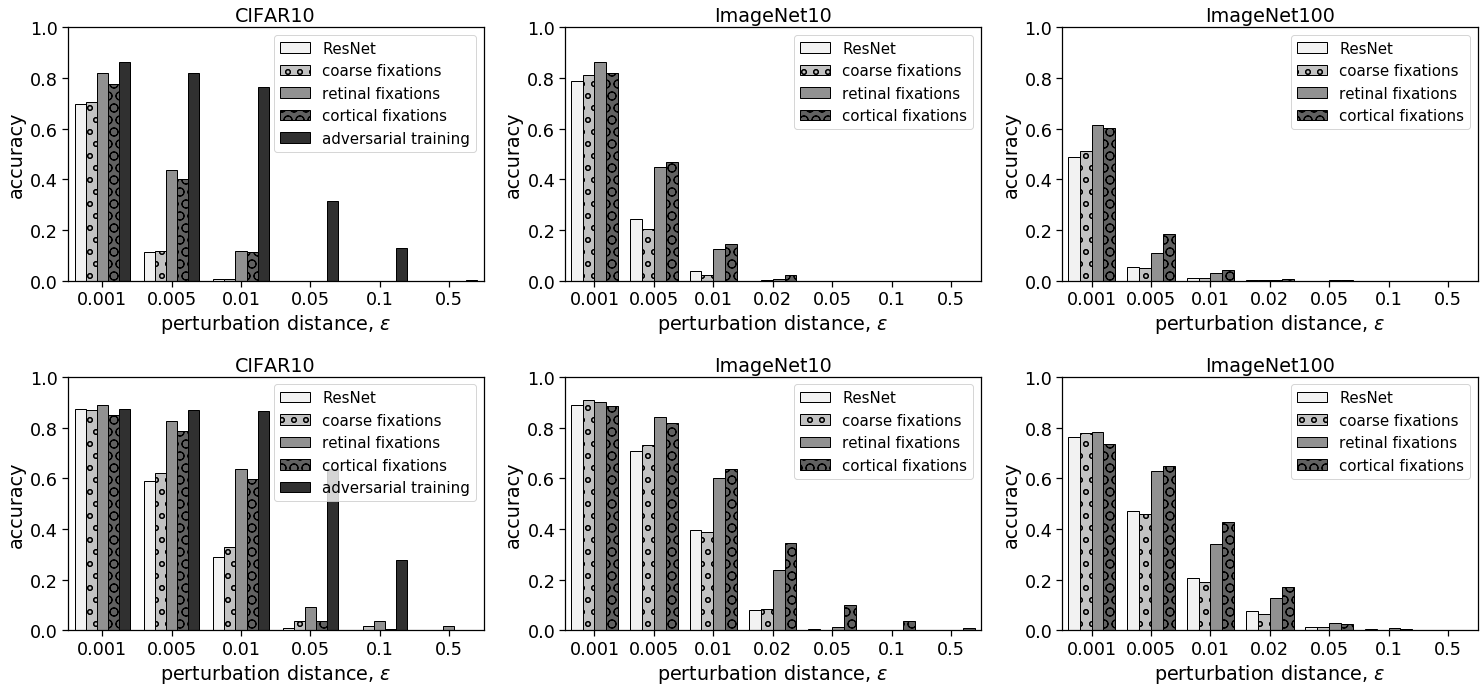

In [13]:
CIFAR10_models = ['madry adv trained', 'baseline', 'cortical sampling', 'retinal sampling', 'coarse fixations']
imagenet_models = ['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY']
criterion_tags = [['misclassify_1', 'misclassify_1'], ['misclassify_3', 'misclassify_10']]

friendly_names = {}
friendly_names['madry adv trained'] = 'adversarial training'
friendly_names['baseline'] = 'ResNet'
friendly_names['coarse fixations'] = 'coarse fixations'
friendly_names['cortical sampling'] = 'cortical fixations'
friendly_names['retinal sampling'] = 'retinal fixations'
friendly_names['CNNwoSAMPLINGwoFIXATIONS'] = 'ResNet'
friendly_names['CNNwoSAMPLINGwFIXATIONS'] = 'coarse fixations'
friendly_names['CNNwSAMPLINGwoFIXATIONS'] = 'retinal fixations'
friendly_names['ECNNwoSAMPLINGwAUXILIARY'] = 'cortical fixations'

friendly_order = ['ResNet', 'coarse fixations', 'retinal fixations', 'cortical fixations', 'adversarial training']

datasets = [CIFAR10_data, imagenet10_data, imagenet100_data]
with sns.plotting_context("notebook", font_scale=1.6):
    plt.figure(figsize=(21, 10))
    for c_i, c in enumerate(criterion_tags):
        for d_i, d in enumerate(datasets):
            d = d.copy()
            
            plt.subplot(2, 3, (d_i+1) + (c_i*len(datasets)))
            if d_i == 0:
                #cifar10
                d = d[d['models'].isin(CIFAR10_models)]
                d_subset = d[d['criterion_tag'] == c[0]]
                
                for m_old, m_new in friendly_names.items():
                    d_subset.loc[d_subset['models'] == m_old, 'models'] = m_new                    
            elif d_i == 1:
                #imagenet10
                d = d[d['model_tag'].isin(imagenet_models)]
                d = d[(d['attack_algo'] == 'PGD') & (d['attack_distance_metric'] == 'LINF') & (d['attack_step_size'] == 0.1) & (d['attack_iterations'] == 5) & (d['attack_random_init'] == False) & (d['random_gaze'] == False)]
                d_subset = d[d['criterion_tag'] == c[0]]
                
                for m_old, m_new in friendly_names.items():
                    d_subset.loc[d_subset['model_tag'] == m_old, 'model_tag'] = m_new
            else:
                #imagenet100
                d = d[d['model_tag'].isin(imagenet_models)]
                d = d[d['attack_distance_metric'] == 'LINF']
                d_subset = d[d['criterion_tag'] == c[1]]
                
                for m_old, m_new in friendly_names.items():
                    d_subset.loc[d_subset['model_tag'] == m_old, 'model_tag'] = m_new

            if d_i == 0:
                friendly_order_subset = [i for i in friendly_order if i in np.unique(d_subset['models'].values)]
                bar = sns.barplot(d_subset['epsilons'], d_subset['adversarial_accuracy'], d_subset['models'], hue_order=friendly_order_subset, palette=sns.light_palette("black"), edgecolor='k')
                plt.title('CIFAR10')
                num_epsilons = 6
            elif d_i == 1:
                friendly_order_subset = [i for i in friendly_order if i in np.unique(d_subset['model_tag'].values)]
                bar = sns.barplot(d_subset['epsilon'], d_subset['adversarial_accuracy'], d_subset['model_tag'], hue_order=friendly_order_subset, palette=sns.light_palette("black"), edgecolor='k')
                plt.title('ImageNet10')
                num_epsilons = 7
            elif d_i == 2:
                friendly_order_subset = [i for i in friendly_order if i in np.unique(d_subset['model_tag'].values)]
                bar = sns.barplot(d_subset['epsilon'], d_subset['adversarial_accuracy'], d_subset['model_tag'], hue_order=friendly_order_subset, palette=sns.light_palette("black"), edgecolor='k')
                plt.title('ImageNet100')
                num_epsilons = 7

            hatches = ['', 'o', '', 'O', '']
            for i,thisbar in enumerate(bar.patches):
                thisbar.set_hatch(hatches[i//num_epsilons])
                
            plt.ylabel('accuracy')
            plt.xlabel('perturbation distance, $\epsilon$')    
            plt.ylim(0, 1)
            plt.legend(prop={"size":15})


    plt.tight_layout()
    plt.savefig('improvement_single_tests_alt.png')
    #plt.show()

# robustness boxenplot

In [13]:
def get_diff(data):
    baseline_1 = data[data['model_tag'] == 'CNNwoSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_1) == 1), baseline_1_val
    baseline_1 = baseline_1[0]
    
    baseline_2 = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_2) == 1)
    baseline_2 = baseline_2[0]
    
    r_val = data[data['model_tag'] == 'CNNwSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(r_val) == 1)
    r_val = r_val[0]
    
    c_val = data[data['model_tag'] == 'ECNNwoSAMPLINGwAUXILIARY']['adversarial_accuracy'].values
    assert(len(c_val) == 1)
    c_val = c_val[0]
    
    baseline = np.max([baseline_1, baseline_2])
    
    return r_val - baseline, c_val - baseline

In [15]:
def get_diff_scaled(data):
    baseline_1 = data[data['model_tag'] == 'CNNwoSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_1) == 1), baseline_1_val
    baseline_1 = baseline_1[0]
    
    baseline_2 = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_2) == 1)
    baseline_2 = baseline_2[0]
    
    r_val = data[data['model_tag'] == 'CNNwSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(r_val) == 1)
    r_val = r_val[0]
    
    c_val = data[data['model_tag'] == 'ECNNwoSAMPLINGwAUXILIARY']['adversarial_accuracy'].values
    assert(len(c_val) == 1)
    c_val = c_val[0]
    
    baseline = np.max([baseline_1, baseline_2])
    
    return (r_val - baseline)/np.max([baseline, 1e-8]), (c_val - baseline)/np.max([baseline, 1e-8])

In [16]:
#noise scan for datasets

def plot_noise_scan(get_diff_fn, y_lim_new, save_file_name):

    IMAGENET_baseline = ['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS']
    IMAGENET_effect = ['CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY']

    datasets = [imagenet10_data, imagenet100_data]
    datasets_name = ['ImageNet10', 'ImageNet100']
    noises = [0.005, 0.01, 0.02]

    with sns.plotting_context("notebook", font_scale=1.3):
        plt.figure(figsize=(16, 10))    
        for d_i, d_u in enumerate(datasets):
            for n_i, n in enumerate(noises):
                d = d_u.copy(deep=True)

                plt.subplot(2, 3, (n_i+1) + (d_i)*len(noises))

                d = d[d['model_tag'].isin(IMAGENET_baseline + IMAGENET_effect)]
                d = d[d['epsilon'] == n]


                diffs = []
                diffs_label = []

                #get unique configs
                store = {}
                pairs_vals = d[['attack_algo', 'attack_distance_metric', 'attack_iterations', 'attack_random_init', 'attack_step_size', 'random_gaze', 'criterion_tag']].values    
                u_pairs = []
                for p in pairs_vals:
                    p = tuple(p)
                    if p not in store:
                        u_pairs.append(p)
                        store[p] = None       

                for p in u_pairs:
                    d_subset = d[(d['attack_algo'] == p[0]) & (d['attack_distance_metric'] == p[1]) & (d['attack_iterations'] == p[2]) & (d['attack_random_init'] == p[3]) & (d['attack_step_size'] == p[4]) & (d['random_gaze'] == p[5]) & (d['criterion_tag'] == p[6])].copy(deep=True)
                    assert(len(d_subset) == 4)
                    r_diff, c_diff = get_diff_fn(d_subset)

                    diffs.append(r_diff)
                    diffs_label.append('retinal fixations')
                    diffs.append(c_diff)
                    diffs_label.append('cortical fixations')


                plt.title('{}\n perturbation distance, $\epsilon$={}'.format(datasets_name[d_i], noises[n_i]))
                sns.boxenplot(diffs_label, diffs, palette=sns.xkcd_palette(['light grey', 'grey']))
                sns.stripplot(diffs_label, diffs, color='k', size=8, jitter=True)
                plt.axhline(y=0,c='r')
                plt.ylabel('$\Delta$ accuracy')
                plt.ylim(y_lim_new)

        plt.tight_layout()
        if save_file_name is None:
            plt.show()
        else:
            plt.savefig(save_file_name)        

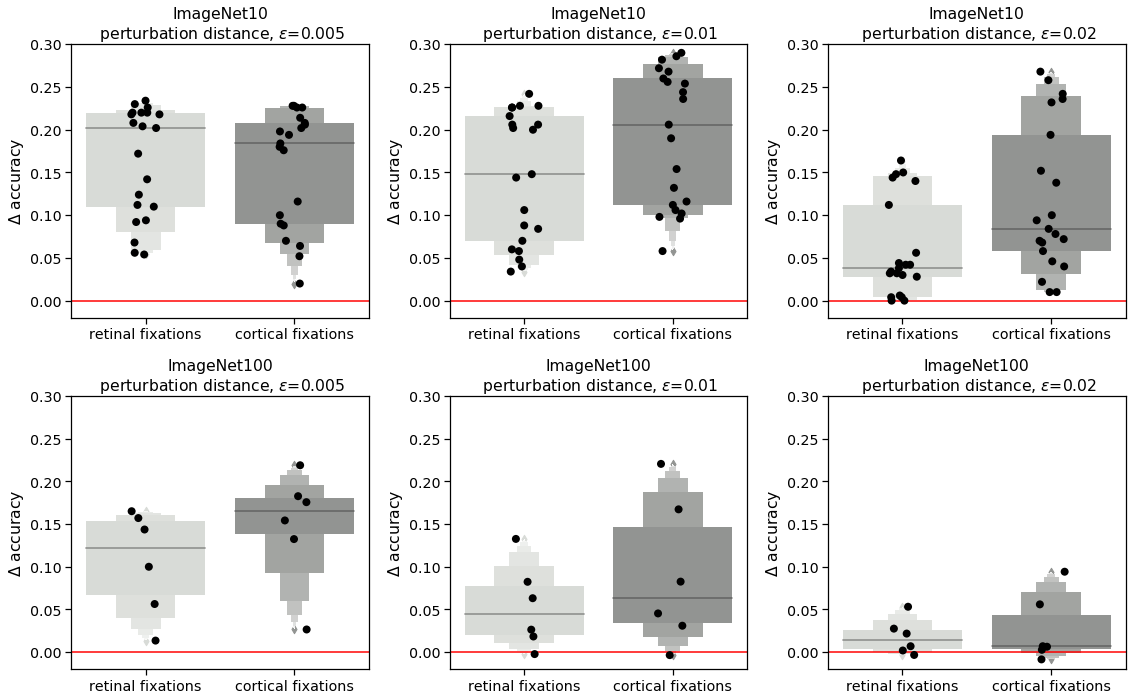

In [17]:
plot_noise_scan(get_diff, (-0.02, 0.3), 'improvement_aggregrate_alt.png')

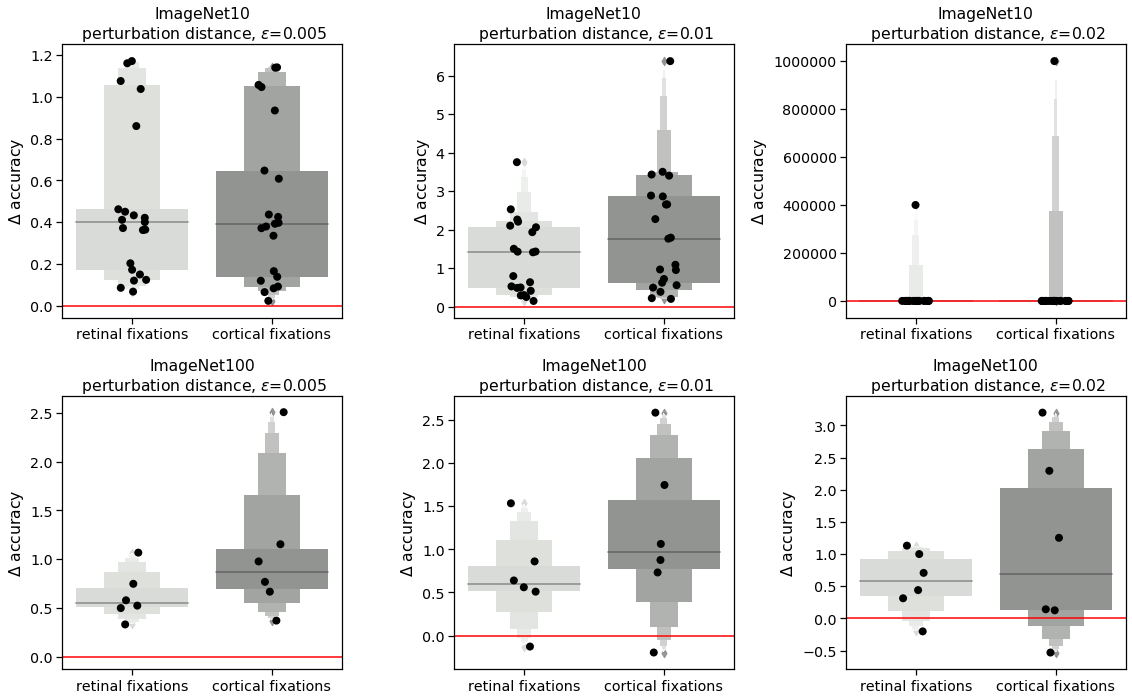

In [18]:
plot_noise_scan(get_diff_scaled, None, None)

# robustness, rough cuts

In [13]:
def get_diff(data):
    baseline_1 = data[data['model_tag'] == 'CNNwoSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_1) == 1), baseline_1_val
    baseline_1 = baseline_1[0]
    
    baseline_2 = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_2) == 1)
    baseline_2 = baseline_2[0]
    
    r_val = data[data['model_tag'] == 'CNNwSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(r_val) == 1)
    r_val = r_val[0]
    
    c_val = data[data['model_tag'] == 'ECNNwoSAMPLINGwAUXILIARY']['adversarial_accuracy'].values
    assert(len(c_val) == 1)
    c_val = c_val[0]
    
    baseline = np.max([baseline_1, baseline_2])
    
    return r_val - baseline, c_val - baseline

In [20]:
def inspect_params_imagenet10(metric_vals, metric_field, noise):

    IMAGENET_baseline = ['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS']
    IMAGENET_effect = ['CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY']

    datasets = [imagenet10_data]
    datasets_name = ['ImageNet10']

    dummy_switch1 = False
    
    for noise_level in noise:
        with sns.plotting_context("notebook", font_scale=1.3):
            plt.figure(figsize=(16, 5))    
            for d_i, d_u in enumerate(datasets):
                for n_i, ad in enumerate(metric_vals):
                    d = d_u.copy(deep=True)

                    plt.subplot(len(datasets), 3, (n_i+1) + (d_i)*len(metric_vals))

                    d = d[d['model_tag'].isin(IMAGENET_baseline + IMAGENET_effect)]
                    d = d[d['epsilon'] == noise_level]
                    
                    if not dummy_switch1:
                        print('possible values: {}'.format(np.unique(d[metric_field].values)))
                        dummy_switch1 = True
                    d = d[d[metric_field] == ad]
                    assert(len(d) > 0)


                    diffs = []
                    diffs_label = []

                    #get unique configs
                    store = {}
                    pairs_vals = d[['attack_algo', 'attack_distance_metric', 'attack_iterations', 'attack_random_init', 'attack_step_size', 'random_gaze', 'criterion_tag']].values    
                    u_pairs = []
                    for p in pairs_vals:
                        p = tuple(p)
                        if p not in store:
                            u_pairs.append(p)
                            store[p] = None       

                    for p in u_pairs:
                        d_subset = d[(d['attack_algo'] == p[0]) & (d['attack_distance_metric'] == p[1]) & (d['attack_iterations'] == p[2]) & (d['attack_random_init'] == p[3]) & (d['attack_step_size'] == p[4]) & (d['random_gaze'] == p[5]) & (d['criterion_tag'] == p[6])].copy(deep=True)
                        assert(len(d_subset) == 4)
                        r_diff, c_diff = get_diff(d_subset)

                        diffs.append(r_diff)
                        diffs_label.append('retinal fixations')
                        diffs.append(c_diff)
                        diffs_label.append('cortical fixations')


                    plt.title('{}\n{} val={}\n$epsilon={}$'.format(datasets_name[d_i], metric_field, metric_vals[n_i], noise_level))
                    sns.boxenplot(diffs_label, diffs, palette=sns.xkcd_palette(['light grey', 'grey']))
                        
                    sns.stripplot(diffs_label, diffs, color='k', size=8, jitter=True)
                    plt.axhline(y=0,c='r')
                    plt.ylabel('$\Delta$ accuracy')
                    plt.ylim(-0.1, 0.5)

            plt.tight_layout()
            plt.show()
    

possible values: ['FGSM' 'PGD' 'PGD_ADAM']


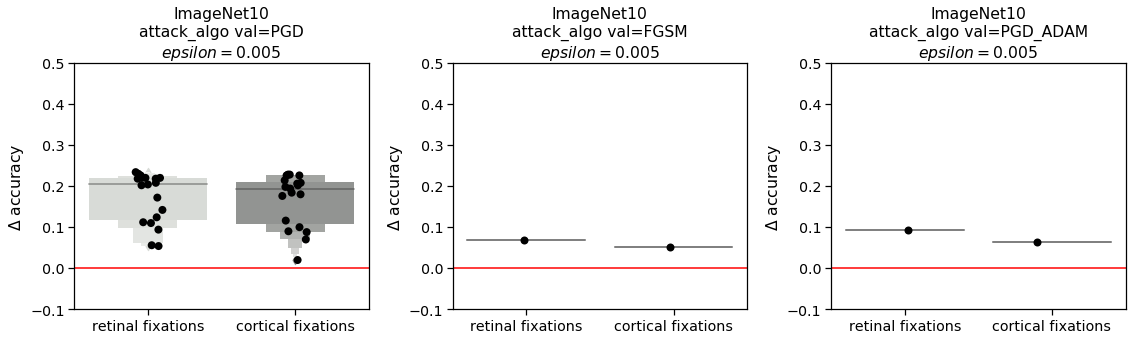

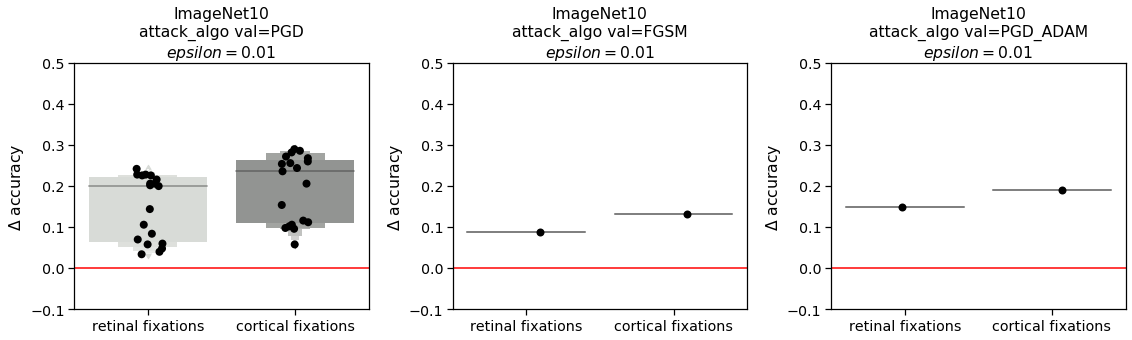

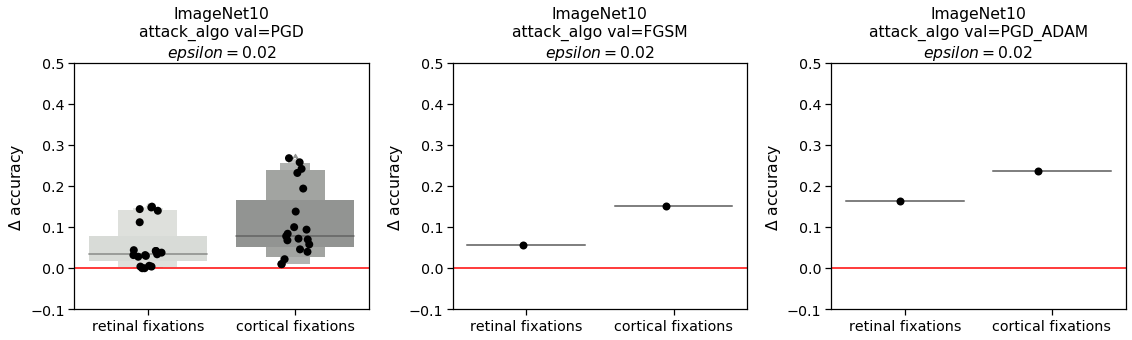

In [21]:
inspect_params_imagenet10(['PGD', 'FGSM', 'PGD_ADAM'], 'attack_algo', [0.005, 0.01, 0.02])

possible values: ['L1' 'L2' 'LINF']


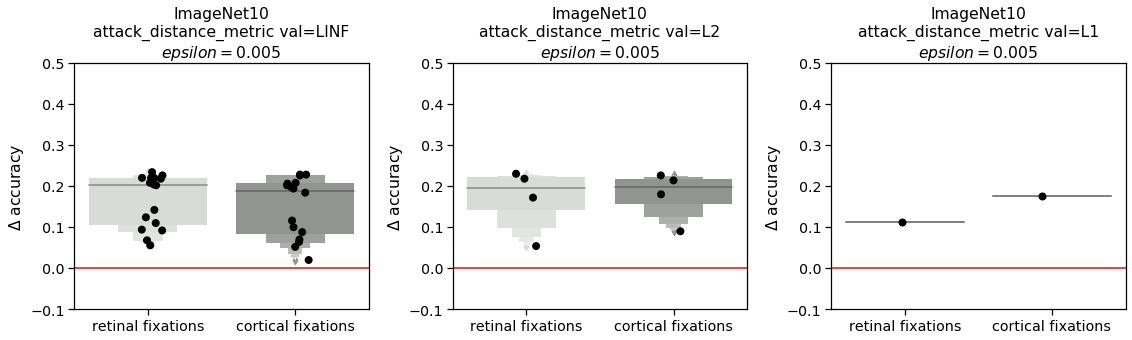

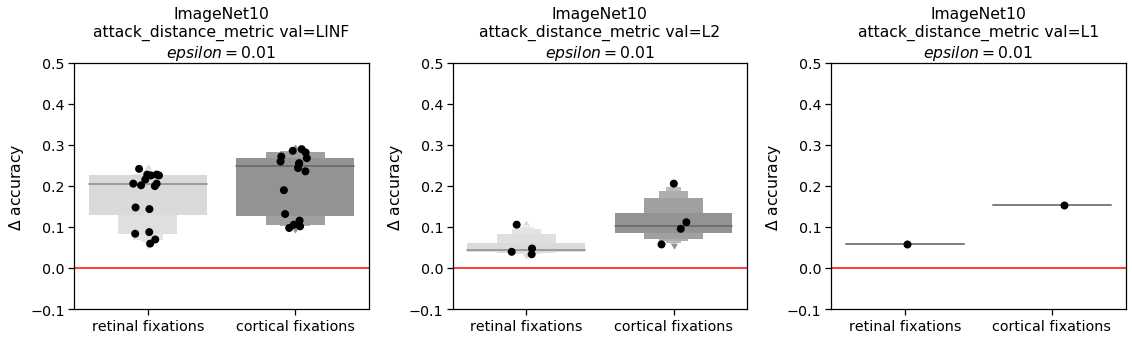

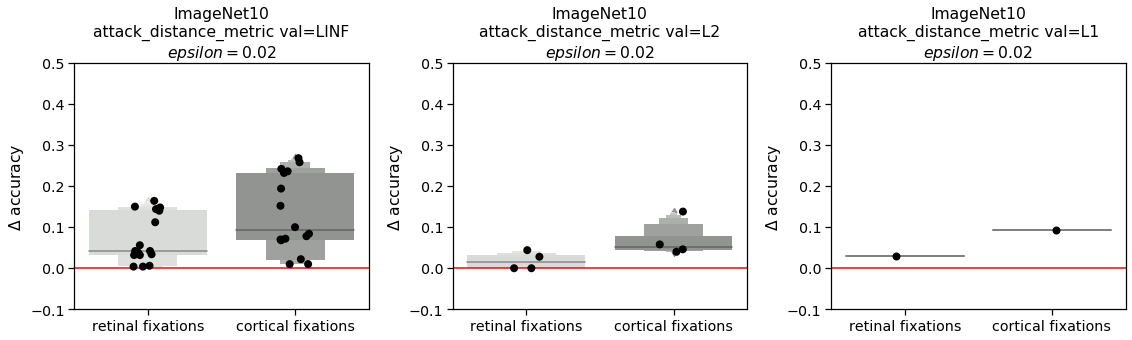

In [22]:
inspect_params_imagenet10(['LINF', 'L2', 'L1'], 'attack_distance_metric', [0.005, 0.01, 0.02])

possible values: [ 1  5 20]


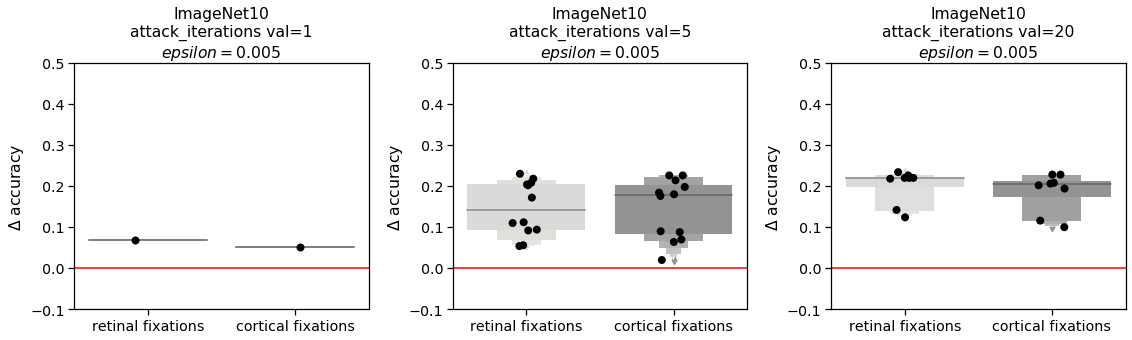

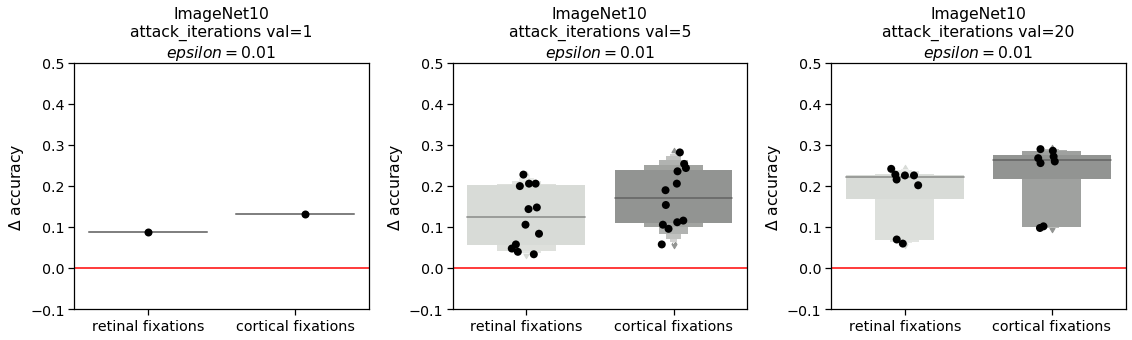

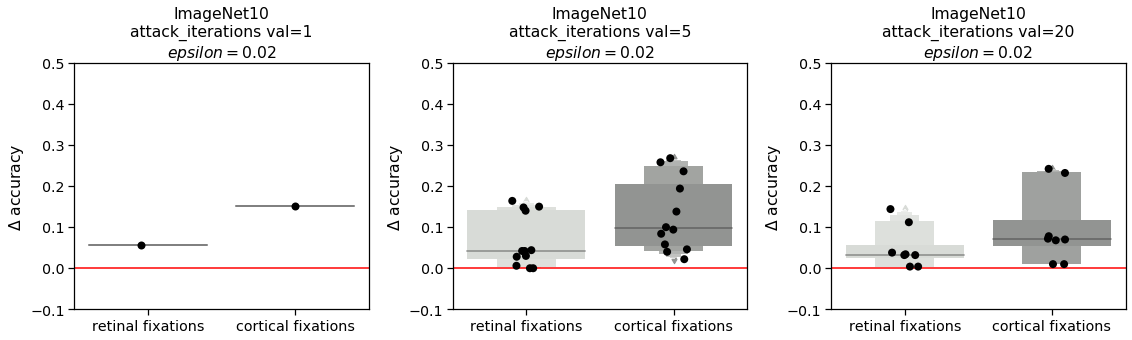

In [23]:
inspect_params_imagenet10([1, 5, 20], 'attack_iterations', [0.005, 0.01, 0.02])

possible values: [-1.     0.025  0.1  ]


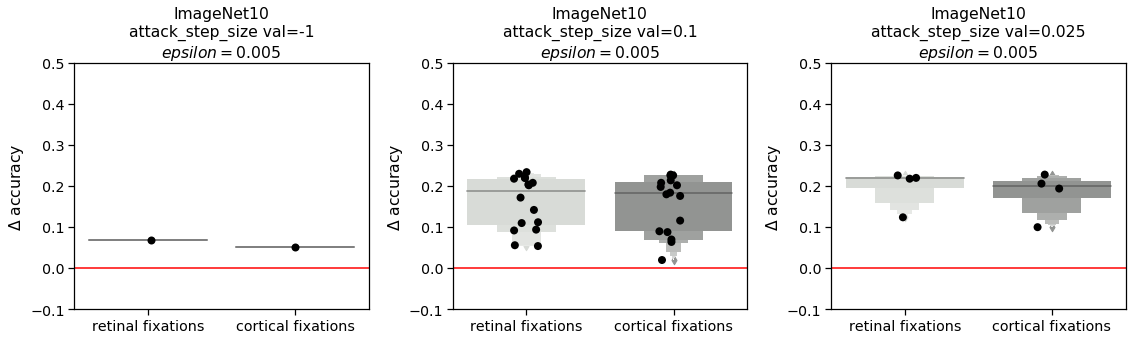

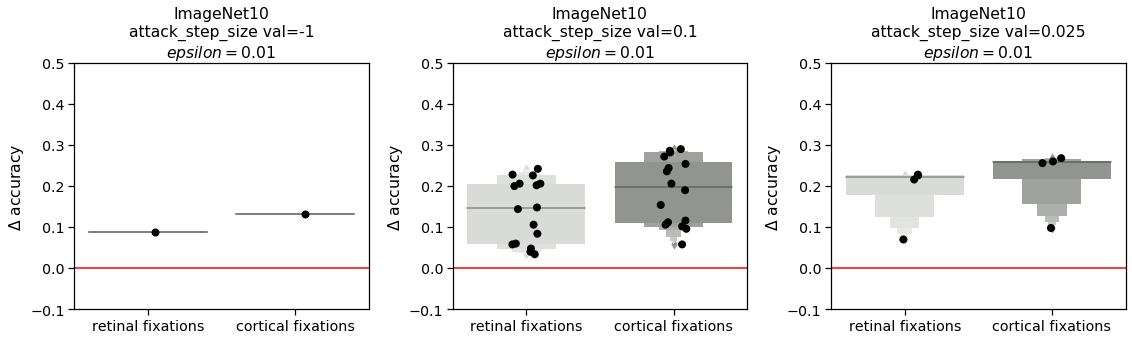

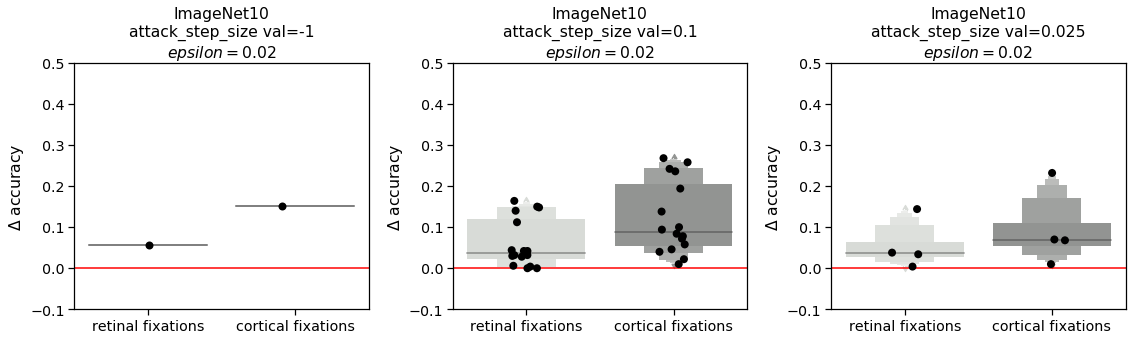

In [24]:
inspect_params_imagenet10([-1, 0.1, 0.025], 'attack_step_size', [0.005, 0.01, 0.02])

possible values: [False  True]


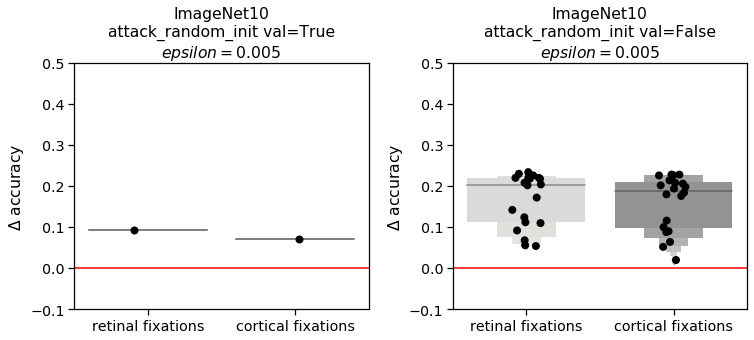

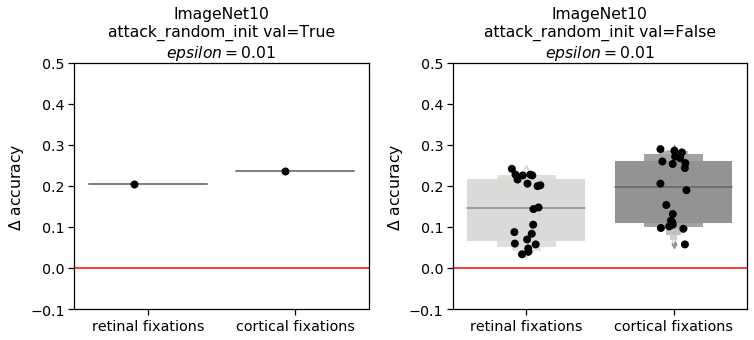

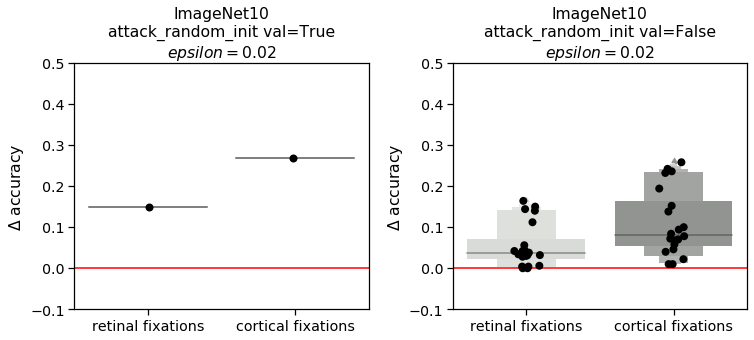

In [25]:
inspect_params_imagenet10([True, False], 'attack_random_init', [0.005, 0.01, 0.02])

possible values: [False  True]


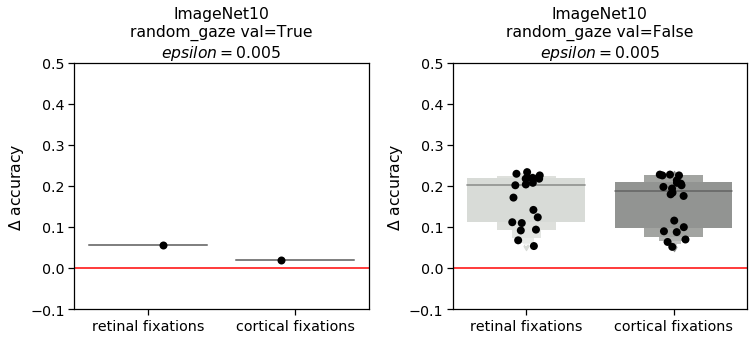

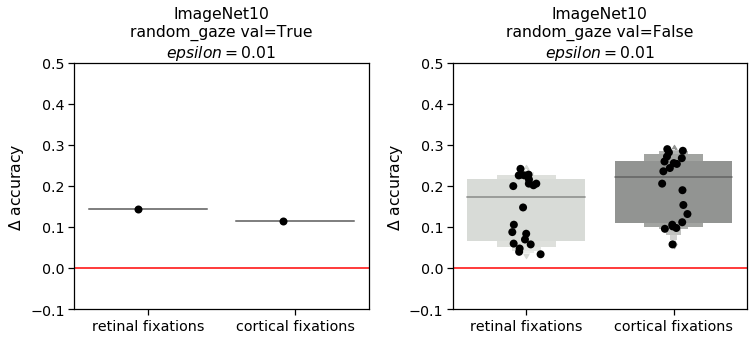

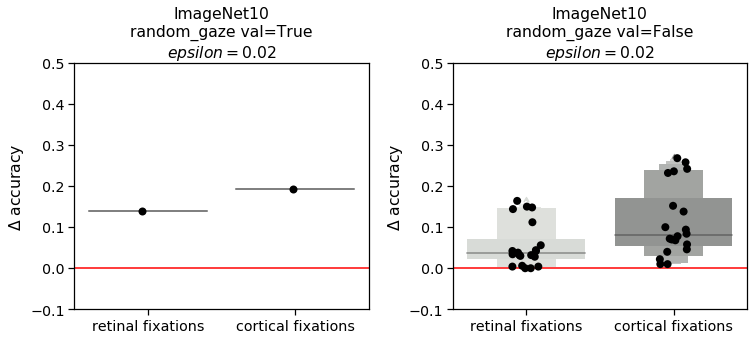

In [26]:
inspect_params_imagenet10([True, False], 'random_gaze', [0.005, 0.01, 0.02])

possible values: ['misclassify_1' 'misclassify_3' 'targeted_50' 'targeted_80']


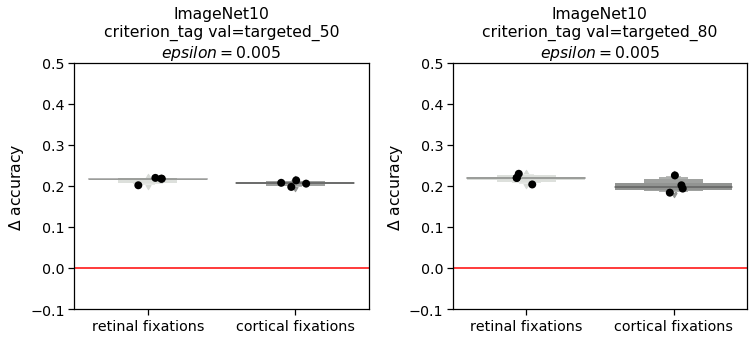

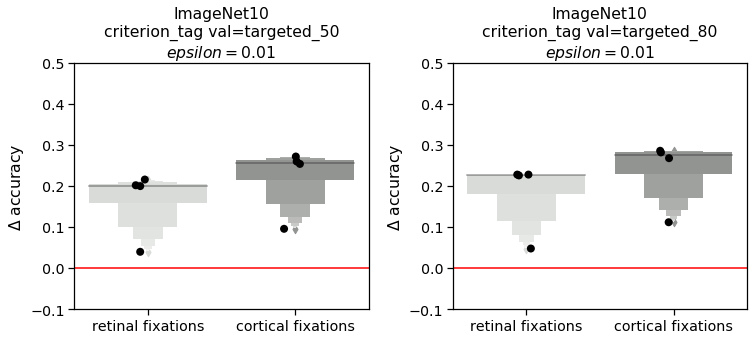

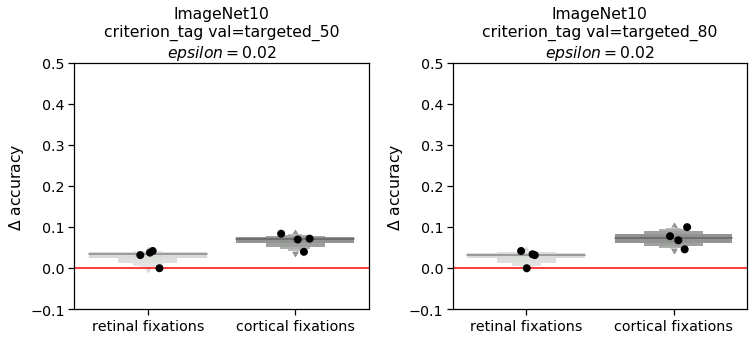

In [27]:
inspect_params_imagenet10(['targeted_50', 'targeted_80'], 'criterion_tag', [0.005, 0.01, 0.02])

possible values: ['misclassify_1' 'misclassify_3' 'targeted_50' 'targeted_80']


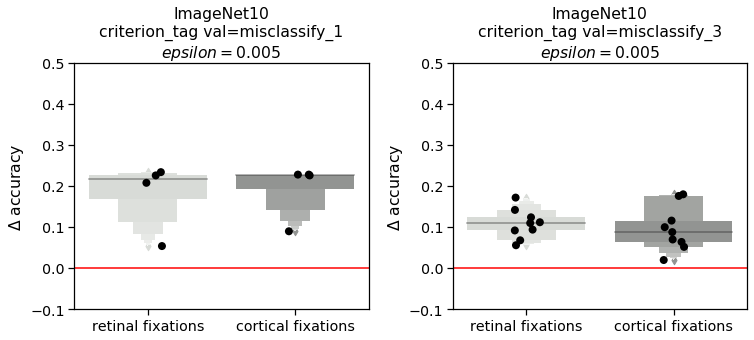

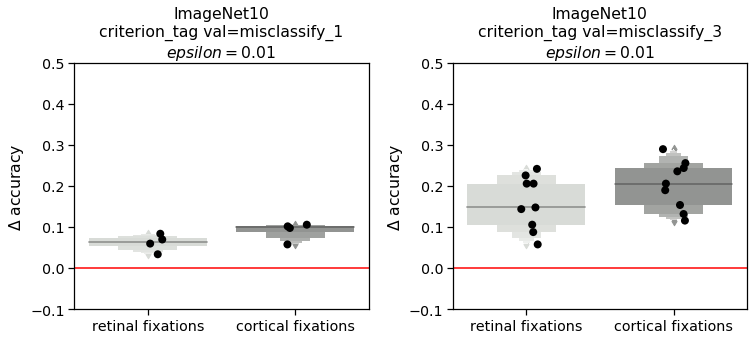

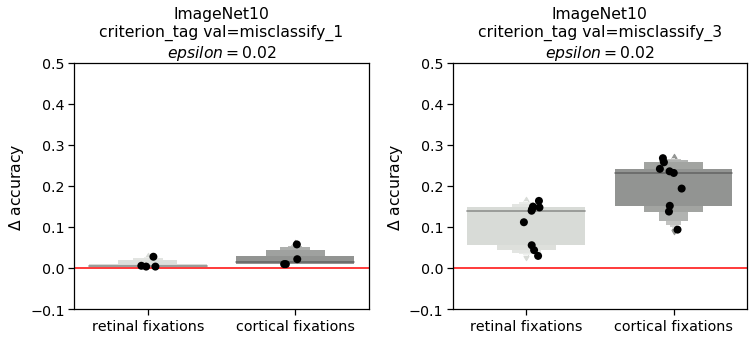

In [28]:
inspect_params_imagenet10(['misclassify_1', 'misclassify_3'], 'criterion_tag', [0.005, 0.01, 0.02])

# robustness, better cuts

In [14]:
def inspect_params_better_imagenet10(conds, metric_vals, metric_field):
    model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
    
    shards = [imagenet10_data[c & model_cond].copy() for c in conds]
    
    print([np.unique(s[metric_field]) for s in shards])
    
    first_len = None
    for s in shards:
        if first_len is None:
            first_len == len(s)
        else:
            assert(len(s) == first_len)
    
    subset = pd.concat(shards)
    
    noises = [0.005, 0.01, 0.02]    

    r_diffs_store = []
    r_diffs_store_label = []

    c_diffs_store = []
    c_diffs_store_label = []
    for n in noises:
        for val in metric_vals:
            split = subset[(subset[metric_field] == val) & (subset['epsilon'] == n)]
#            split = split[split['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])]
            
            r_diff, c_diff = get_diff(split)

            r_diffs_store.append(r_diff)
            r_diffs_store_label.append(val)

            c_diffs_store.append(c_diff)
            c_diffs_store_label.append(val)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.title('retina')
    sns.boxenplot(r_diffs_store_label, r_diffs_store)
    sns.stripplot(r_diffs_store_label, r_diffs_store, color='k', size=8)
    #plt.show()
    
    plt.subplot(1, 4, 2)
    plt.title('retina')
    sns.stripplot(r_diffs_store_label, r_diffs_store, color='k', size=8)
    #plt.show()
    
    plt.subplot(1, 4, 3)
    plt.title('cortical')
    sns.boxenplot(c_diffs_store_label, c_diffs_store)
    sns.stripplot(c_diffs_store_label, c_diffs_store, color='k', size=8)
    #plt.show()
    
    plt.subplot(1, 4, 4)
    plt.title('cortical')
    sns.stripplot(c_diffs_store_label, c_diffs_store, color='k', size=8)
    
    plt.tight_layout()
    plt.show()

In [33]:
def pretty_inspect_params_better_imagenet10(conds, metric_vals, metric_field):
    with sns.plotting_context("notebook", font_scale=1.6):
        model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])

        shards = [imagenet10_data[c & model_cond].copy() for c in conds]

        print([np.unique(s[metric_field]) for s in shards])

        first_len = None
        for s in shards:
            if first_len is None:
                first_len == len(s)
            else:
                assert(len(s) == first_len)

        subset = pd.concat(shards)

        noises = [0.005, 0.01, 0.02]    

        r_diffs_store = []
        r_diffs_store_label = []

        c_diffs_store = []
        c_diffs_store_label = []
        for n in noises:
            for val in metric_vals:
                split = subset[(subset[metric_field] == val) & (subset['epsilon'] == n)]
    #            split = split[split['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])]

                r_diff, c_diff = get_diff(split)

                r_diffs_store.append(r_diff)
                r_diffs_store_label.append(val)

                c_diffs_store.append(c_diff)
                c_diffs_store_label.append(val)

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title('retina sampling\n' + r'$\epsilon$ = 0.005, 0.01, 0.02')
        sns.stripplot(r_diffs_store_label, r_diffs_store, color='k', size=8)
        plt.axhline(y=0, c='r')
        plt.xlabel(metric_field)
        plt.ylabel('$\Delta$ accuracy')

        plt.subplot(1, 2, 2)
        plt.title('cortical sampling\n' + r'$\epsilon$ = 0.005, 0.01, 0.02')
        sns.stripplot(c_diffs_store_label, c_diffs_store, color='k', size=8)
        plt.axhline(y=0, c='r')
        plt.xlabel(metric_field)
        plt.ylabel('$\Delta$ accuracy')

        plt.tight_layout()
        plt.show()

[array(['FGSM'], dtype=object), array(['PGD_ADAM'], dtype=object), array(['PGD'], dtype=object)]


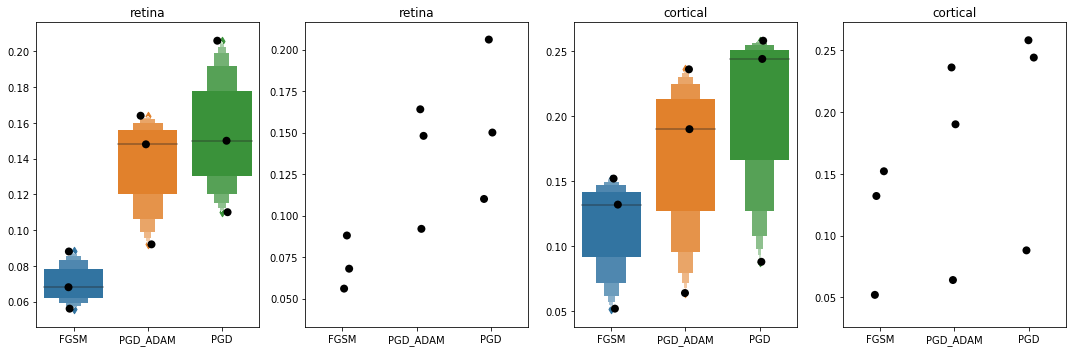

[array(['FGSM'], dtype=object), array(['PGD_ADAM'], dtype=object), array(['PGD'], dtype=object)]


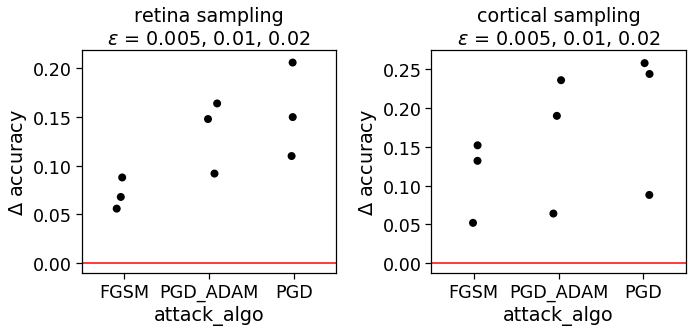

In [34]:
## attack algo

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'FGSM') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 1) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == -1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD_ADAM') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)
cond3 =  (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond) == np.sum(cond3 & model_cond))

conds = [cond1, cond2, cond3]

vals = ['FGSM', 'PGD_ADAM', 'PGD']
field = 'attack_algo'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

[array([20]), array([5])]


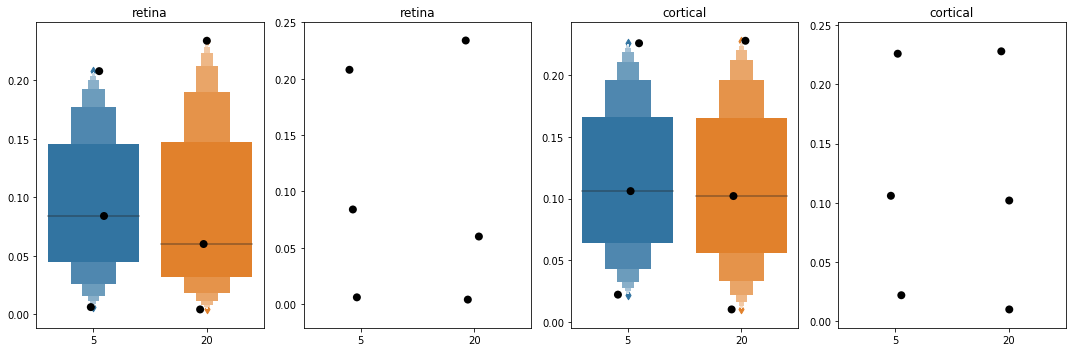

[array([20]), array([5])]


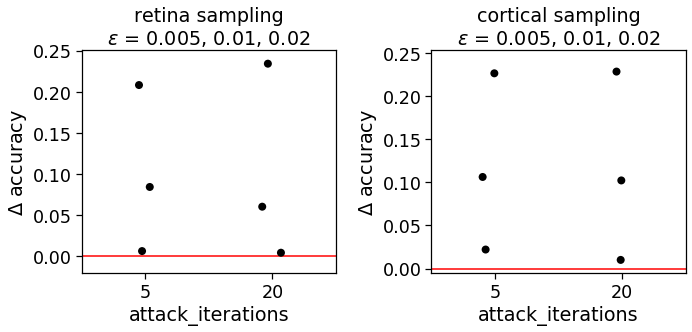

In [35]:
## num iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = [5, 20]
field = 'attack_iterations'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

[array([0.025]), array([0.1])]


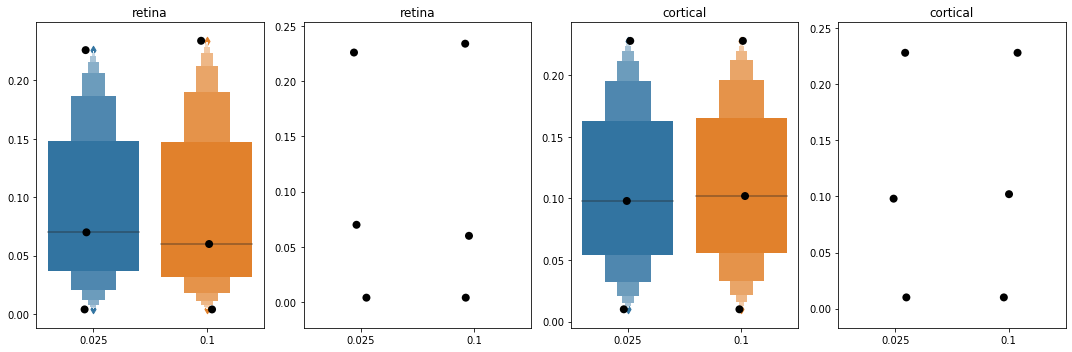

[array([0.025]), array([0.1])]


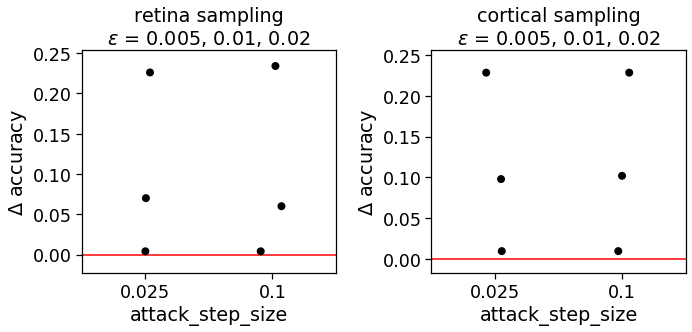

In [36]:
## step size

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.025) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = [0.1, 0.025]
field = 'attack_step_size'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

[array(['LINF'], dtype=object), array(['L2'], dtype=object), array(['L1'], dtype=object)]


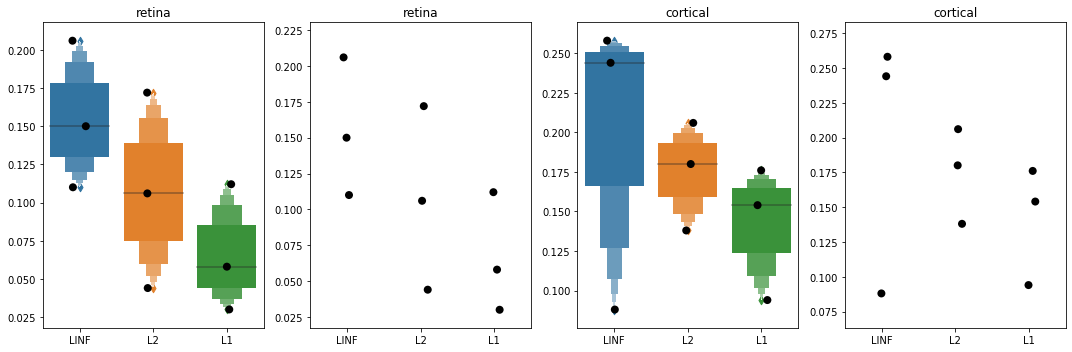

[array(['LINF'], dtype=object), array(['L2'], dtype=object), array(['L1'], dtype=object)]


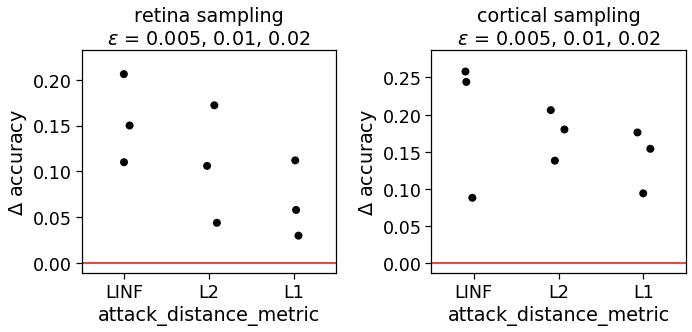

In [37]:
## distance metric

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L2') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)
cond3 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L1') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond) == np.sum(cond3 & model_cond))

conds = [cond1, cond2, cond3]

vals = ['LINF', 'L2', 'L1']
field = 'attack_distance_metric'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

[array(['targeted_50'], dtype=object), array(['targeted_80'], dtype=object)]


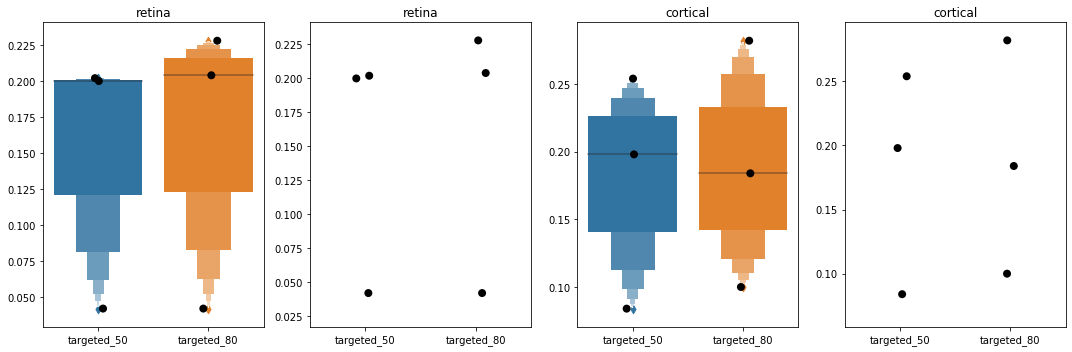

In [40]:
## confident misclassification, targeted LINF 5 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_80') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['targeted_50', 'targeted_80']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)

[array(['targeted_50'], dtype=object), array(['targeted_80'], dtype=object)]


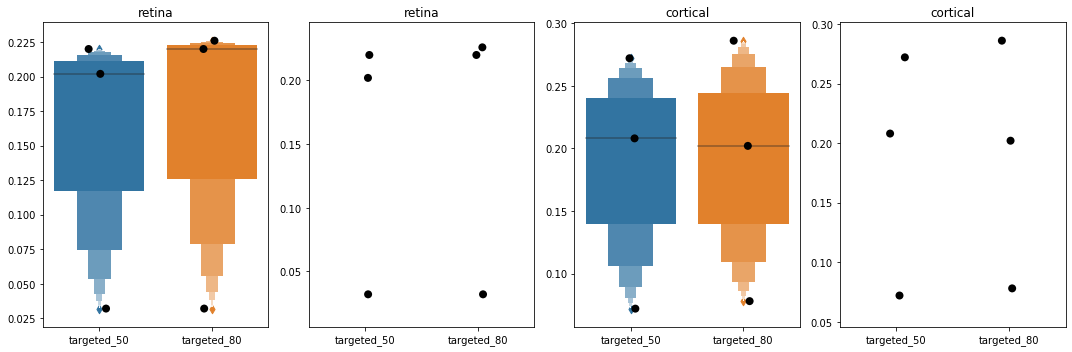

In [67]:
## confident misclassification, targeted LINF 20 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_80') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['targeted_50', 'targeted_80']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)

[array(['targeted_50'], dtype=object), array(['targeted_80'], dtype=object)]


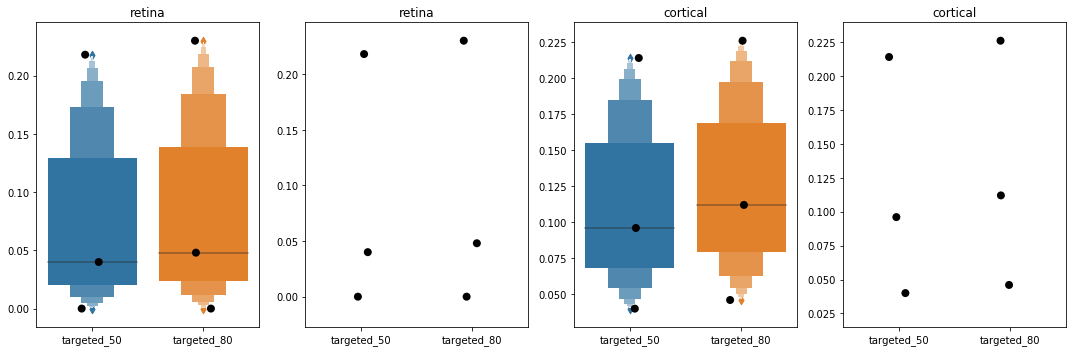

[array(['targeted_50'], dtype=object), array(['targeted_80'], dtype=object)]


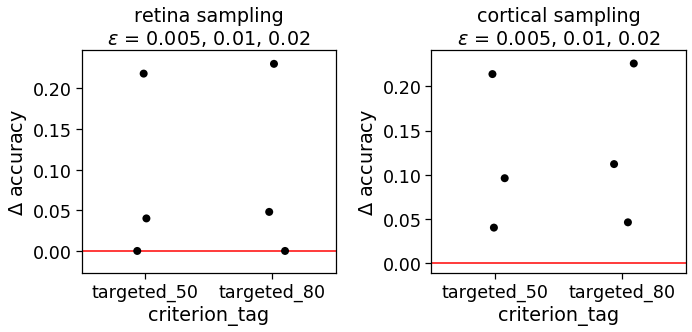

In [41]:
## confident misclassification, targeted L2 5 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L2') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_50') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L2') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'targeted_80') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['targeted_50', 'targeted_80']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

[array(['misclassify_1'], dtype=object), array(['misclassify_3'], dtype=object)]


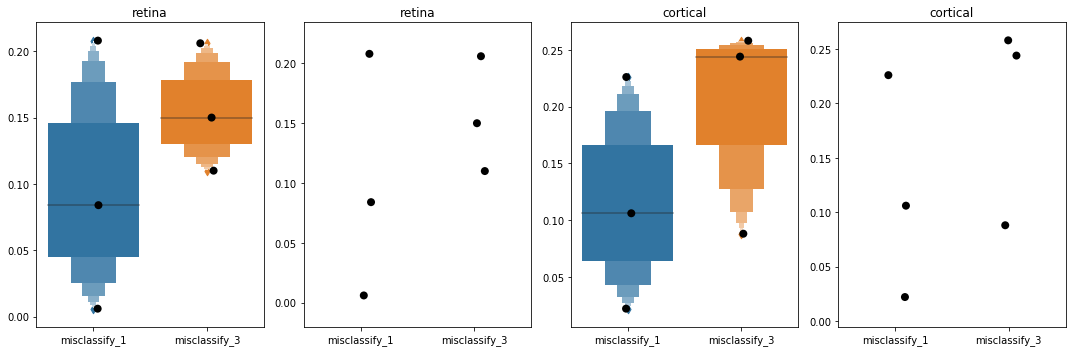

In [70]:
## confident misclassification, targeted LINF 5 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['misclassify_1', 'misclassify_3']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)

[array(['misclassify_1'], dtype=object), array(['misclassify_3'], dtype=object)]


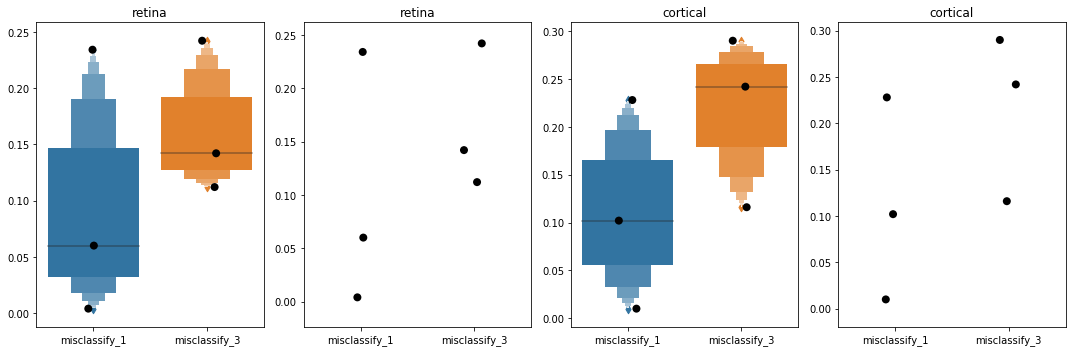

In [71]:
## confident misclassification, targeted LINF 20 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 20) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['misclassify_1', 'misclassify_3']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)

[array(['misclassify_1'], dtype=object), array(['misclassify_3'], dtype=object)]


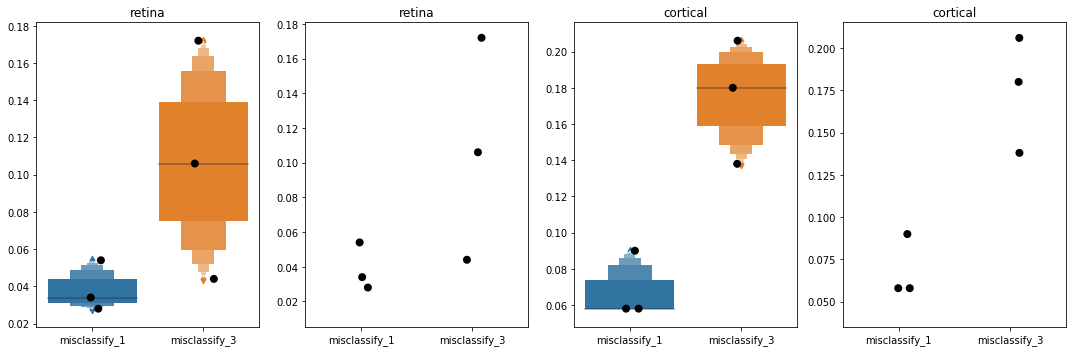

[array(['misclassify_1'], dtype=object), array(['misclassify_3'], dtype=object)]


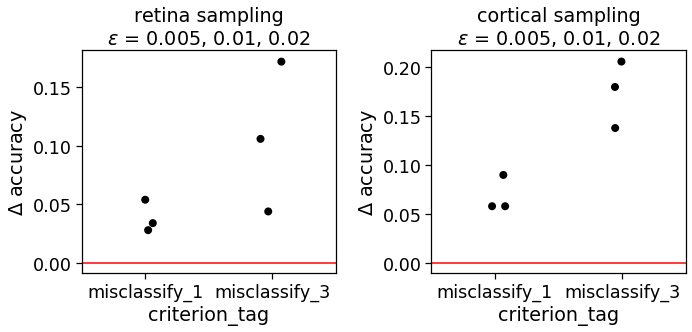

In [39]:
## confident misclassification, targeted L2 5 iterations

#baseline=(imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'LINF') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)

cond1 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L2') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_1') & (imagenet10_data['random_gaze'] == False)
cond2 = (imagenet10_data['attack_algo'] == 'PGD') & (imagenet10_data['attack_distance_metric'] == 'L2') & (imagenet10_data['attack_iterations'] == 5) & (imagenet10_data['attack_random_init'] == False) & (imagenet10_data['attack_step_size'] == 0.1) & (imagenet10_data['criterion_tag'] == 'misclassify_3') & (imagenet10_data['random_gaze'] == False)

model_cond = imagenet10_data['model_tag'].isin(['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwSAMPLINGwoFIXATIONS', 'ECNNwoSAMPLINGwAUXILIARY'])
assert(np.sum(cond1 & model_cond) == np.sum(cond2 & model_cond))

conds = [cond1, cond2]

vals = ['misclassify_1', 'misclassify_3']
field = 'criterion_tag'
inspect_params_better_imagenet10(conds,vals, field)
pretty_inspect_params_better_imagenet10(conds,vals, field)

# robustness ablation 

In [11]:
def get_diff(data, diff_id):    
    baseline_1 = data[data['model_tag'] == 'CNNwoSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_1) == 1), baseline_1_val
    baseline_1 = baseline_1[0]
    
    baseline_2 = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONS']['adversarial_accuracy'].values
    assert(len(baseline_2) == 1)
    baseline_2 = baseline_2[0]
    
    baseline = np.max([baseline_1, baseline_2])
    
    if diff_id == 0:
        #retinal ablation
        u_val = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONSwUPSAMPLE']['adversarial_accuracy'].values
        assert(len(u_val) == 1)
        u_val = u_val[0]
        
        r_val = data[data['model_tag'] == 'CNNwSAMPLINGwoFIXATIONS']['adversarial_accuracy'].values
        assert(len(r_val) == 1)
        r_val = r_val[0]
        
        return u_val - baseline, r_val - baseline
        
    elif diff_id == 1:
        #cortical ablation
        
        branch_val = data[data['model_tag'] == 'CNNwBRANCHED']['adversarial_accuracy'].values
        assert(len(branch_val) == 1)
        branch_val = branch_val[0]
        
        blur_val = data[data['model_tag'] == 'CNNwoSAMPLINGwFIXATIONSwBLUR']['adversarial_accuracy'].values
        assert(len(blur_val) == 1)
        blur_val = blur_val[0]
        
        ecnn_single_val = data[data['model_tag'] == 'ECNNwoSAMPLINGwSINGLESCALE']['adversarial_accuracy'].values
        assert(len(ecnn_single_val) == 1)
        ecnn_single_val = ecnn_single_val[0]
        
        ecnn_val = data[data['model_tag'] == 'ECNNwoSAMPLINGwAUXILIARY']['adversarial_accuracy'].values
        assert(len(ecnn_val) == 1)
        ecnn_val = ecnn_val[0]
        
        return branch_val - baseline, blur_val - baseline, ecnn_single_val - baseline, ecnn_val - baseline

In [75]:
from matplotlib import gridspec

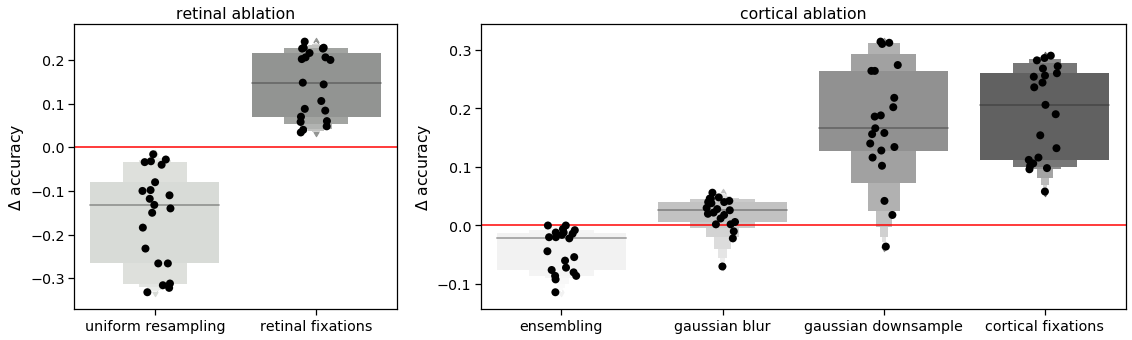

In [77]:
#ablation scans for dataset

retinal_ablation = ['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwoSAMPLINGwFIXATIONSwUPSAMPLE', 'CNNwSAMPLINGwoFIXATIONS']
cortical_ablation = ['CNNwoSAMPLINGwoFIXATIONS', 'CNNwoSAMPLINGwFIXATIONS', 'CNNwoSAMPLINGwFIXATIONSwBLUR', 'CNNwBRANCHED', 'ECNNwoSAMPLINGwSINGLESCALE', 'ECNNwoSAMPLINGwAUXILIARY'] 
ablations = [retinal_ablation, cortical_ablation]
noise = 0.01

#f, a = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
with sns.plotting_context("notebook", font_scale=1.3):
    plt.figure(figsize=(16, 5))    
    for ab_i, ab_m in enumerate(ablations):
        d = imagenet10_data.copy(deep=True)
        
        plt.subplot(gs[ab_i])
#         if ab_i == 0:
#             plt.subplot(1, 3, 1)
#         elif ab_i == 1:
#             plt.subplot(1, 3, 2 : 3)
        
        d = d[d['model_tag'].isin(ab_m)]
        d = d[d['epsilon'] == noise]
        
        diffs = []
        diffs_label = []

        #get unique configs
        store = {}
        pairs_vals = d[['attack_algo', 'attack_distance_metric', 'attack_iterations', 'attack_random_init', 'attack_step_size', 'random_gaze', 'criterion_tag']].values    
        u_pairs = []
        for p in pairs_vals:
            p = tuple(p)
            if p not in store:
                u_pairs.append(p)
                store[p] = None       

        for p in u_pairs:
            d_subset = d[(d['attack_algo'] == p[0]) & (d['attack_distance_metric'] == p[1]) & (d['attack_iterations'] == p[2]) & (d['attack_random_init'] == p[3]) & (d['attack_step_size'] == p[4]) & (d['random_gaze'] == p[5]) & (d['criterion_tag'] == p[6])].copy(deep=True)
            
            if ab_i == 0:
                #retinal
                assert(len(d_subset) == 4)
                
                u_diff, r_diff = get_diff(d_subset, ab_i)

                diffs.append(u_diff)
                diffs_label.append('uniform resampling')
                diffs.append(r_diff)
                diffs_label.append('retinal fixations')
            elif ab_i == 1:
                #cortical
                assert(len(d_subset) == 6)
                
                branch_diff, blur_diff, ecnn_single_diff, ecnn_diff = get_diff(d_subset, ab_i)
                
                diffs.append(branch_diff)
                diffs_label.append('ensembling')
                
                diffs.append(blur_diff)
                diffs_label.append('gaussian blur')
                
                diffs.append(ecnn_single_diff)
                diffs_label.append('gaussian downsample')
                
                diffs.append(ecnn_diff)
                diffs_label.append('cortical fixations')
                

        if ab_i == 0:
            plt.title('retinal ablation')
            sns.boxenplot(diffs_label, diffs, palette=sns.xkcd_palette(['light grey', 'grey']))
        elif ab_i == 1:
            plt.title('cortical ablation')
            sns.boxenplot(diffs_label, diffs, palette=sns.light_palette("black"))
        
        sns.stripplot(diffs_label, diffs, color='k', jitter=True, size=8)
        plt.axhline(y=0,c='r')
        plt.ylabel('$\Delta$ accuracy')
        #plt.xticks(rotation=10)
        #plt.ylim(None)

    plt.tight_layout()
    plt.savefig('robustness_ablation_alt.png')
    plt.show()

# CIFAR 10 ROBUSTNESS BENCHMARK

In [13]:
CIFAR10_data[CIFAR10_data['models'] == 'madry adv trained']

,adversarial_accuracy,criterion_tag,epsilons,models,vanilla_accuracy,vanilla_loss
12,0.86149,misclassify_1,0.001,madry adv trained,0.8714,0.459215
13,0.82060,misclassify_1,0.005,madry adv trained,0.8714,0.459215
14,0.76600,misclassify_1,0.010,madry adv trained,0.8714,0.459215
15,0.31260,misclassify_1,0.050,madry adv trained,0.8714,0.459215
16,0.12949,misclassify_1,0.100,madry adv trained,0.8714,0.459215
17,0.00120,misclassify_1,0.500,madry adv trained,0.8714,0.459215
6,0.87140,misclassify_3,0.001,madry adv trained,0.8714,0.459215
7,0.87070,misclassify_3,0.005,madry adv trained,0.8714,0.459215
8,0.86380,misclassify_3,0.010,madry adv trained,0.8714,0.459215
9,0.63730,misclassify_3,0.050,madry adv trained,0.8714,0.459215


In [ ]:
# MADRY BENCHMARK
# 0.001: 86.15%
# 0.005: 82.06%
# 0.01: 76.60%
# 0.05: 31.26%
# 0.1: 12.95%
# 0.5: 0.12%